# Necessary imports for data analysis

In [83]:
import pandas as pd
import numpy as np
import json
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [84]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Brief look at the data

In [85]:
df = pd.read_csv('../transactions.csv')

In [86]:
# Look at the first few rows of the dataframe
df.head()

,id,account_id,description,description_raw,category,currency_code,amount,balance,date,status,type,provider_code,created_at,updated_at,payment_data,credit_card_data,merchant
0,00101b10-8204-4ce3-bea0-68c2f152db4a,bccb05e6-5f09-4aee-b8e4-719d85c09692,PIX ENVIADO Joao Vitor Sousa Escudero,PIX ENVIADO Joao Vitor Sousa Escudero,Transferência mesma titularidade,BRL,-1012.58,NaN,2025-08-01 15:01:28.374,POSTED,DEBIT,NaN,2025-08-02 04:16:04.527,2025-08-06 04:21:48.072,"{""payer"":{""name"":null,""branchNumber"":null,""acc...",NaN,NaN
1,00219086-4722-439e-b285-7f133acde977,bccb05e6-5f09-4aee-b8e4-719d85c09692,RECARGA TELEFONE CELULAR IB 11 *****0859 TIM...,RECARGA TELEFONE CELULAR IB 11 *****0859 TIM...,Telecomunicação,BRL,-20.00,NaN,2025-07-21 18:18:57.776,POSTED,DEBIT,NaN,2025-07-29 13:47:58.698,2025-07-30 04:30:22.849,"{""payer"":{""name"":null,""branchNumber"":null,""acc...",NaN,"{""cnae"":""6110801"",""cnpj"":""02421421000111"",""nam..."
2,0071a75f-dd2b-490d-b06a-1d84963d3b49,bccb05e6-5f09-4aee-b8e4-719d85c09692,PIX RECEBIDO JOAO VITOR SOUSA ESCUDERO,PIX RECEBIDO JOAO VITOR SOUSA ESCUDERO,Transferência mesma titularidade,BRL,200.00,NaN,2025-04-24 08:09:26.323,POSTED,CREDIT,NaN,2025-07-29 13:47:58.763,2025-07-30 04:30:22.886,"{""payer"":{""name"":null,""branchNumber"":""0001"",""a...",NaN,NaN
3,00b6e801-b9a0-40c6-be2b-e859b7625f4b,bccb05e6-5f09-4aee-b8e4-719d85c09692,PIX ENVIADO Ff Tech E Participacoes L,PIX ENVIADO Ff Tech E Participacoes L,Serviços digitais,BRL,-42.33,NaN,2025-07-18 21:46:05.201,POSTED,DEBIT,NaN,2025-07-29 13:47:58.7,2025-07-30 04:30:22.85,"{""payer"":{""name"":null,""branchNumber"":null,""acc...",NaN,"{""cnae"":""6202300"",""cnpj"":""37571055000161"",""nam..."
4,00c8c46d-3d0e-4298-b9d9-fcabc9d9076c,bccb05e6-5f09-4aee-b8e4-719d85c09692,DEBITO VISA ELECTRON BRASIL 25/06 57.326.384...,DEBITO VISA ELECTRON BRASIL 25/06 57.326.384...,Transferência para terceiros - Débito,BRL,-87.00,NaN,2025-06-25 18:21:35.509,POSTED,DEBIT,NaN,2025-07-29 13:47:58.725,2025-07-30 04:30:22.861,"{""payer"":{""name"":null,""branchNumber"":null,""acc...",NaN,NaN


In [87]:
# Check the shape of the dataframe
df.shape

(841, 17)

In [88]:
# Get info about the dataframe, like data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                841 non-null    object 
 1   account_id        841 non-null    object 
 2   description       841 non-null    object 
 3   description_raw   841 non-null    object 
 4   category          841 non-null    object 
 5   currency_code     841 non-null    object 
 6   amount            841 non-null    float64
 7   balance           0 non-null      float64
 8   date              841 non-null    object 
 9   status            841 non-null    object 
 10  type              841 non-null    object 
 11  provider_code     0 non-null      float64
 12  created_at        841 non-null    object 
 13  updated_at        841 non-null    object 
 14  payment_data      841 non-null    object 
 15  credit_card_data  0 non-null      float64
 16  merchant          319 non-null    object 
dt

In [89]:
# Check for missing values in each column
df.isnull().sum()

id                    0
account_id            0
description           0
description_raw       0
category              0
currency_code         0
amount                0
balance             841
date                  0
status                0
type                  0
provider_code       841
created_at            0
updated_at            0
payment_data          0
credit_card_data    841
merchant            522
dtype: int64

# A bit of data processing

In [90]:
print(f"Total Transactions: {df.shape[0]}")

Total Transactions: 841


In [91]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 841 rows and 17 columns.


In [92]:
# Converting date column and creating new date columns for analysis
df['date'] = pd.to_datetime(df['date'], format='ISO8601')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.day_name()
df['year_month'] = df['date'].dt.to_period('M')

In [ ]:
# Splitting debits and turning amounts to absolute values for easier analysis
df['is_debit'] = df['type'] == 'DEBIT'
df['amount_abs'] = np.abs(df['amount'])

In [95]:
# Taking a look at the analysed period
print(f"Data covers from {df['date'].min().date()} to {df['date'].max().date()}")

Data covers from 2025-04-07 to 2025-08-05


## 1. Quantitative Analysis

In [96]:
# The dataframe with only debit transactions
df_debits = df[df['is_debit']].copy()

In [97]:
df_debits.shape

(647, 23)

### Analysing the main statistics per category for debits

In [98]:
# Descriptive Statistics for Debit Transactions by Category
debits_category_stats = df_debits.groupby('category')['amount_abs'].agg([
    ('total_transactions', 'count'),
    ('total_amount', 'sum'),
    ('average_amount', 'mean'),
    ('median_amount', 'median'),
    ('min_amount', 'min'),
    ('max_amount', 'max'),
    ('std_amount', 'std'),
    ('coeff_variation', lambda x: np.std(x) / np.mean(x) if np.mean(x) != 0 else 0),
    ('Q25_amount', lambda x: np.percentile(x, 25)),
    ('Q75_amount', lambda x: np.percentile(x, 75))
]).round(2).sort_values(by='total_amount', ascending=False)

In [99]:
debits_category_stats

,total_transactions,total_amount,average_amount,median_amount,min_amount,max_amount,std_amount,coeff_variation,Q25_amount,Q75_amount
category,,,,,,,,,,
Transferência mesma titularidade,79,76220.38,964.81,250.00,1.00,21300.00,2667.96,2.75,100.00,900.00
Transferência - PIX,83,28603.07,344.62,200.00,10.00,2000.00,406.60,1.17,77.50,480.00
Compras,76,8835.24,116.25,40.00,5.90,2246.00,282.24,2.41,23.00,94.58
Supermercado,35,8264.73,236.14,69.90,8.00,2500.00,499.50,2.08,23.54,217.83
Serviços,37,8152.39,220.33,54.00,4.00,4103.73,666.61,2.98,31.08,207.86
"Restaurantes, bares e lanchonetes",62,6169.38,99.51,54.06,2.00,571.84,109.77,1.09,33.42,143.62
Aluguel de veículos,2,5690.08,2845.04,2845.04,221.27,5468.81,3710.57,0.92,1533.16,4156.92
Investimentos,70,5109.26,72.99,33.75,1.00,615.89,118.58,1.61,12.82,67.08
Livraria,2,3261.71,1630.86,1630.86,44.40,3217.31,2243.59,0.97,837.63,2424.08


Observations:

- total_transactions: Refers to the frequency of spends;
- total_amount: refers to the total amount for the particular category;
- average_amount, median_amount: works like a "default" spent per transaction;
- std_amount, coeff_variation: tell us about the variability in the data;
- min, max, Q25, Q75: tell us about the data distribution;
- percentage_of_total: is the "weight" of each category.

In [100]:
# Adding percentage of the total debits for each category
debits_category_stats['percentage_of_total'] = (debits_category_stats['total_amount'] / debits_category_stats['total_amount'].sum() * 100)\
    .round(2)

debits_category_stats['percentage_of_total'].sort_values(ascending=False)

category
Transferência mesma titularidade                   43.20
Transferência - PIX                                16.21
Compras                                             5.01
Supermercado                                        4.68
Serviços                                            4.62
Restaurantes, bares e lanchonetes                   3.50
Aluguel de veículos                                 3.22
Investimentos                                       2.90
Livraria                                            1.85
Postos de gasolina                                  1.81
Delivery de alimentos                               1.30
Vestiário                                           1.28
Transferência para terceiros - PIX                  0.99
Pedágios e pagamentos no veículo                    0.94
Serviços digitais                                   0.85
Hospedagem                                          0.72
Telecomunicação                                     0.70
Dentista              

In [101]:
# Overall Spending Statistics
total_spendings = df_debits['amount_abs'].sum()
total_received = df[~df['is_debit']]['amount_abs'].sum()

print(f"\nTotal Movement:")
print(f"Total Expenses: R$ {total_spendings:,.2f}")
print(f"Total Received: R$ {total_received:,.2f}")
print(f"Period Balance: R$ {(total_received - total_spendings):,.2f}")

print(f"\nGeneral Spending Statistics:")
print(f"Average Spend per Transaction: R$ {df_debits['amount_abs'].mean():,.2f}")
print(f"Average Spend: R$ {df_debits['amount_abs'].median():,.2f}")
print(f"Standard Deviation: R$ {df_debits['amount_abs'].std():,.2f}")
print(f"Largest Individual Expense: R$ {df_debits['amount_abs'].max():,.2f}")
print(f"Lowest Individual Expense: R$ {df_debits['amount_abs'].min():,.2f}")


Total Movement:
Total Expenses: R$ 176,445.28
Total Received: R$ 176,555.65
Period Balance: R$ 110.37

General Spending Statistics:
Average Spend per Transaction: R$ 272.71
Average Spend: R$ 70.97
Standard Deviation: R$ 1,036.25
Largest Individual Expense: R$ 21,300.00
Lowest Individual Expense: R$ 0.32


### 1.1 Monthly variation in total spending

In [102]:
# Mensal Aggregation
sazonality_debits = df_debits.groupby('year_month').agg(
    amount_abs_sum=('amount_abs', 'sum'),
    amount_abs_mean=('amount_abs', 'mean'),
    amount_abs_median=('amount_abs', 'median'),
    amount_abs_std=('amount_abs', 'std'),
    amount_abs_count=('amount_abs', 'count')
).round(2)

In [103]:
sazonality_debits

,amount_abs_sum,amount_abs_mean,amount_abs_median,amount_abs_std,amount_abs_count
year_month,,,,,
2025-04,24128.10,234.25,114.34,318.01,103
2025-05,71561.73,439.03,71.00,1891.23,163
2025-06,29840.37,152.25,50.00,285.05,196
2025-07,37709.71,227.17,68.13,556.72,166
2025-08,13205.37,695.02,109.91,1195.34,19


<Figure size 1200x600 with 0 Axes>

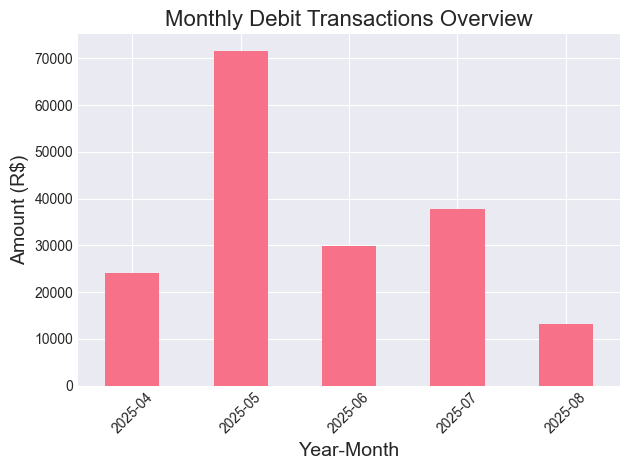

In [104]:
# Plotting Monthly Debit Transactions Overview
sazonality_debits.index = sazonality_debits.index.astype(str)

plt.figure(figsize=(12, 6))
ax = sazonality_debits.plot(kind='bar', y='amount_abs_sum', legend=False)
ax.set_title('Monthly Debit Transactions Overview', fontsize=16)
ax.set_xlabel('Year-Month', fontsize=14)
ax.set_ylabel('Amount (R$)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

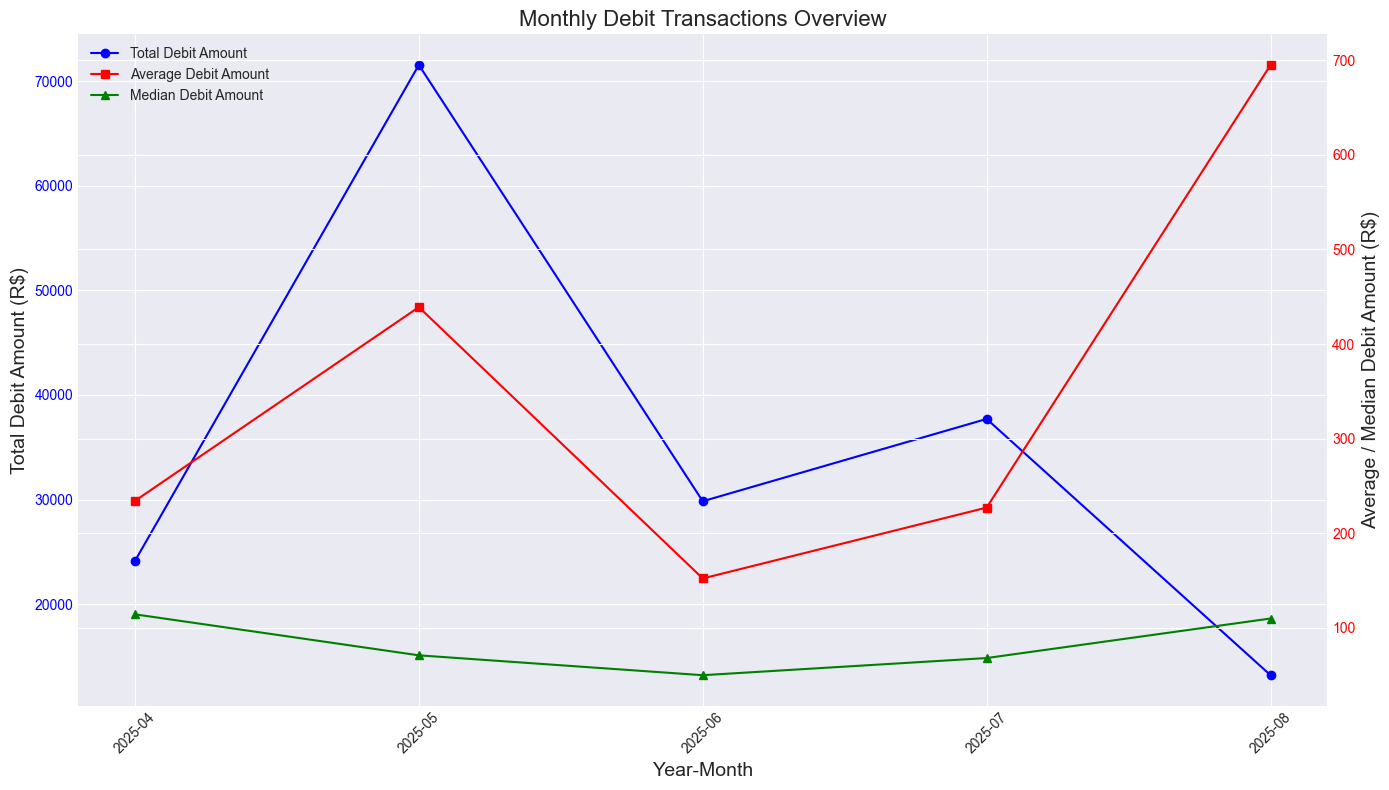

In [105]:
fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.set_title('Monthly Debit Transactions Overview', fontsize=16)
ax1.set_xlabel('Year-Month', fontsize=14)
ax1.set_ylabel('Total Debit Amount (R$)', fontsize=14)

line1 = ax1.plot(sazonality_debits.index, sazonality_debits['amount_abs_sum'], marker='o', color='b', label='Total Debit Amount')
ax1.tick_params(axis='y', labelcolor='b')
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
ax2.set_ylabel('Average / Median Debit Amount (R$)', fontsize=14)
line2 = ax2.plot(sazonality_debits.index, sazonality_debits['amount_abs_mean'], marker='s', color='r', label='Average Debit Amount')
ax2.tick_params(axis='y', labelcolor='r')

line3 = ax2.plot(sazonality_debits.index, sazonality_debits['amount_abs_median'], marker='^', color='g', label='Median Debit Amount')
lines = line1 + line2 + line3
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')
fig.tight_layout()
plt.show();

In [106]:
# Applying a Linear Regression to identify some trends
x = np.arange(len(sazonality_debits))
slope, intercept, r_value, p_value, std_err = stats.linregress(x, sazonality_debits['amount_abs_sum'])

In [107]:
# Printing the values of the linear regression
print(f"Linear Regression Results:")
print(f"Slope: {slope:.2f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard Error: {std_err:.2f}")

Linear Regression Results:
Slope: -5569.75
R-squared: 0.1580
P-value: 0.5076
Standard Error: 7423.59


In [108]:
if slope > 0:
    print(f"Growing trend -> Slope: {slope:.2f} ")
else:
    print(f"Decreasing trend -> Slope: {slope:.2f} ")
    
print(f"R-squared: {r_value**2:.4f}")

Decreasing trend -> Slope: -5569.75 
R-squared: 0.1580


Some important notes here:
- As we can see, on May the spent was a lot higher then the other four months. The debit value is around 71k, and the second higher value is on July, with a debit around 37k.
- The slope of -5569 indicates that, on average, the spents are decreasing along the way.
- The R^2 is informing to us how "strong" is this trend. In this particular case, our R2 is kind of low, around 0.15 (15%), which indicates a decreasing trend, but not so reliable. 

### 2. Identifying patterns

In [109]:
# Which categories have the greatest variability in spending?
top_variable_categories = debits_category_stats.sort_values(by='coeff_variation', ascending=False).head(5)

In [110]:
top_variable_categories

,total_transactions,total_amount,average_amount,median_amount,min_amount,max_amount,std_amount,coeff_variation,Q25_amount,Q75_amount,percentage_of_total
category,,,,,,,,,,,
Serviços,37,8152.39,220.33,54.0,4.0,4103.73,666.61,2.98,31.08,207.86,4.62
Transferência mesma titularidade,79,76220.38,964.81,250.0,1.0,21300.00,2667.96,2.75,100.00,900.00,43.20
Compras,76,8835.24,116.25,40.0,5.9,2246.00,282.24,2.41,23.00,94.58,5.01
Supermercado,35,8264.73,236.14,69.9,8.0,2500.00,499.50,2.08,23.54,217.83,4.68
Pedágios e pagamentos no veículo,10,1663.51,166.35,18.3,12.4,922.35,284.16,1.62,14.02,213.92,0.94


In [111]:
# Are there any atypical behaviors (outliers) that deserve attention?
outliers_list = []

for category, stats in debits_category_stats.iterrows():
    q1 = stats['Q25_amount']
    q3 = stats['Q75_amount']
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    category_outliers = df_debits[
        (df_debits['category'] == category) &
        ((df_debits['amount_abs'] > upper_bound) |
        (df_debits['amount_abs'] < lower_bound))
    ]
    if not category_outliers.empty:
        for index, row in category_outliers.iterrows():
            outliers_list.append({
                'category': category,
                'amount_abs': row['amount_abs'],
                'date': row['date'],
                'description': row['description']
            })
if outliers_list:
    outliers_df = pd.DataFrame(outliers_list).sort_values(by='amount_abs', ascending=False)
    print("Outliers Identified:")
    print(outliers_df.to_string(index=False, float_format='R$ {:.2f}'.format))
else:
    print("No outliers detected.")

Outliers Identified:
                          category  amount_abs                    date                                             description
  Transferência mesma titularidade R$ 21300.00 2025-05-30 12:18:01.244                 PIX ENVIADO   Joao Vitor Sousa Escudero
  Transferência mesma titularidade R$ 10397.00 2025-05-02 12:33:00.364                 PIX ENVIADO   Joao Vitor Sousa Escudero
  Transferência mesma titularidade  R$ 4400.00 2025-08-03 01:44:40.524                 PIX ENVIADO   Joao Vitor Sousa Escudero
                          Serviços  R$ 4103.73 2025-05-17 23:15:16.274                 PIX ENVIADO   OKAYTOPAY PAGAMENTOS E CA
                      Supermercado  R$ 2500.00 2025-07-12 15:52:26.391                       PIX ENVIADO   Frutaria Beach Ltda
                           Compras  R$ 2246.00 2025-07-08 18:35:21.639 DEBITO VISA ELECTRON BRASIL   08/07 OAK E503 O STORE MO
  Transferência mesma titularidade  R$ 2200.00 2025-05-14 12:41:33.521                 PIX

In [112]:
# Outliers Descriptive Statistics
print(f"Total Outliers Detected: {len(outliers_df)}")
print(f"Total Amount of Outliers: R$ {outliers_df['amount_abs'].sum():,.2f}")
print(f"Average Outlier Amount: R$ {outliers_df['amount_abs'].mean():,.2f}")
print(f"Median Outlier Amount: R$ {outliers_df['amount_abs'].median():,.2f}")
print(f"Percentage of Outliers Relative to Total Debits: {len(outliers_df) / len(df_debits) * 100:.2f}%")
print()
print("Categories with Outliers:")
print(outliers_df['category'].value_counts().head(10))

Total Outliers Detected: 45
Total Amount of Outliers: R$ 68,849.01
Average Outlier Amount: R$ 1,529.98
Median Outlier Amount: R$ 477.81
Percentage of Outliers Relative to Total Debits: 6.96%

Categories with Outliers:
category
Investimentos                        8
Compras                              7
Transferência - PIX                  5
Transferência mesma titularidade     4
Supermercado                         4
Restaurantes, bares e lanchonetes    4
Serviços digitais                    4
Estacionamentos                      2
Serviços                             1
Pedágios e pagamentos no veículo     1
Name: count, dtype: int64


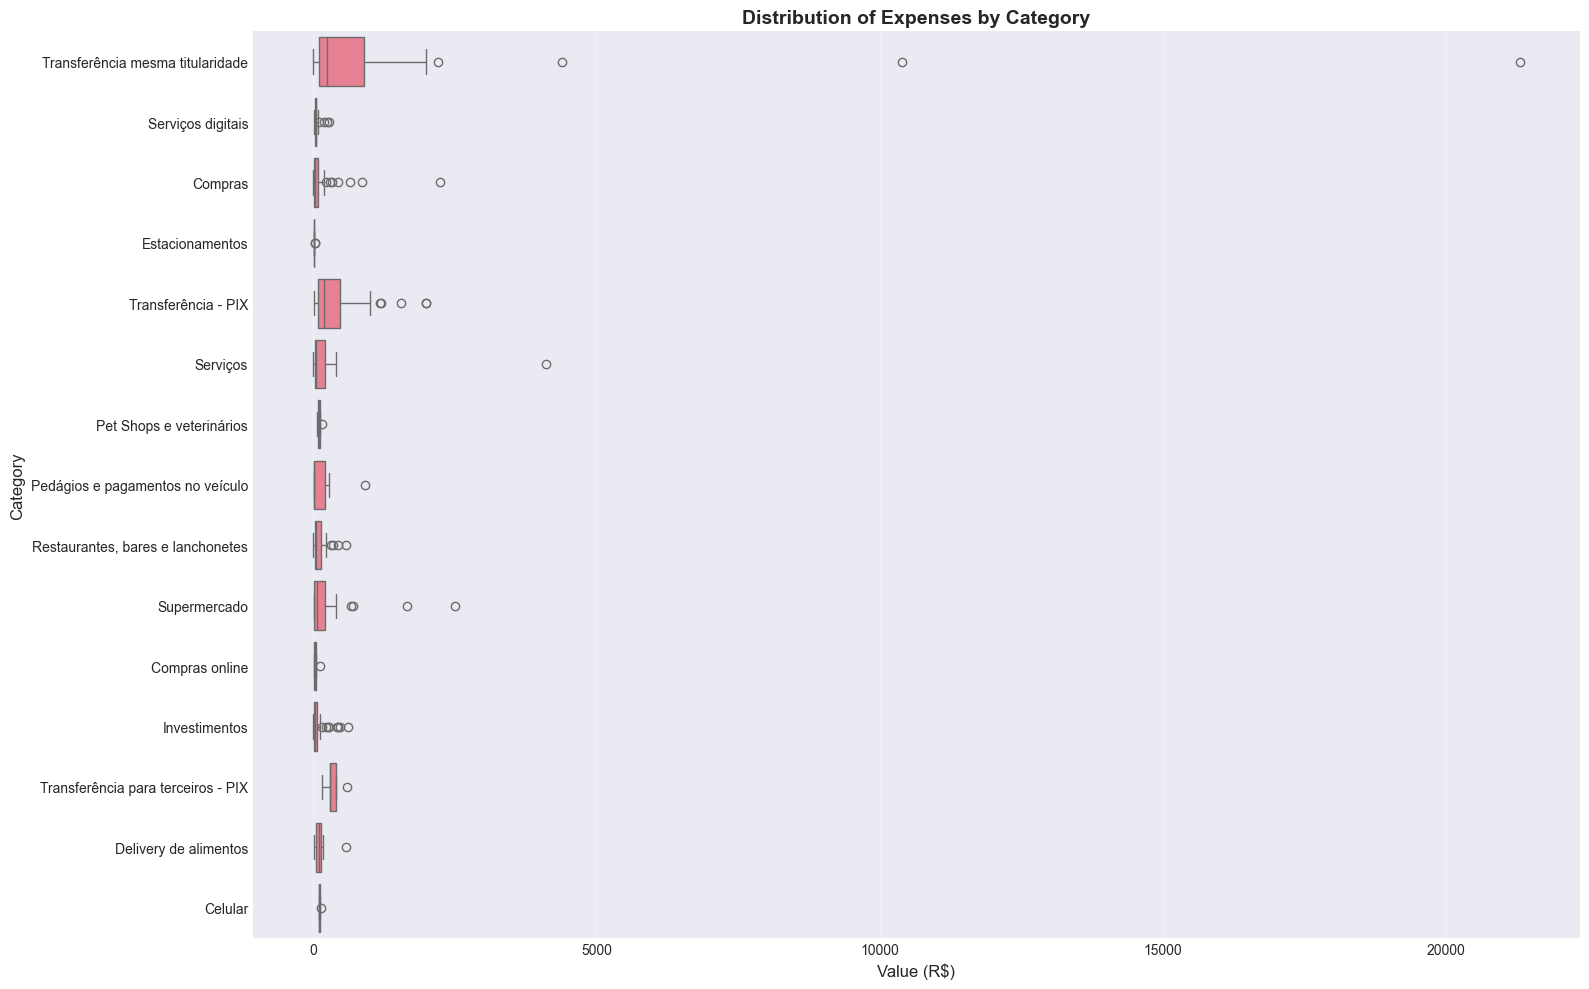

In [113]:
# Boxplot Visualization of Outliers by Category
plt.figure(figsize=(16, 10))
categories_with_outliers = outliers_df['category'].unique()
df_plot = df_debits[df_debits['category'].isin(categories_with_outliers)]

sns.boxplot(data=df_plot, y='category', x='amount_abs', orient='h')
plt.xlabel('Value (R$)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.title('Distribution of Expenses by Category', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show();

In [114]:
# Outliers by month
outliers_df['month'] = outliers_df['date'].dt.to_period('M')
outliers_by_month = outliers_df.groupby('month').agg({
    'amount_abs': ['count', 'sum', 'mean', 'median']
}).round(2)
outliers_by_month.columns = ['Total Outliers', 'Total_R$', 'Average_R$', 'Median_R$']
print("\nOutliers by Month:")
print(outliers_by_month)


Outliers by Month:
         Total Outliers  Total_R$  Average_R$  Median_R$
month                                                   
2025-04               8   4353.38      544.17     506.10
2025-05              10  40149.73     4014.97     593.86
2025-06              11   6865.99      624.18     436.12
2025-07              15  13079.91      871.99     321.14
2025-08               1   4400.00     4400.00    4400.00


- The analysis of the data reveals some patterns. Spending variability, measured by the Coefficient of Variation (CV), is highest in categories such as 'Serviços' (CV: 2.98) e 'Transferência mesma titularidade' (CV: 2.75).   
- The overall spending trend shows a decreasing pattern with an R-squared value of 0.1580, suggesting that the trend is weakly supported by the data.
- Several outliers are detected and will be better analyzed on the conclusion.

# Conclusion

We have a dataset that contains 841 observations and 17 features. When looking at these features, it is possible to notice that there are 3 features (balance, provider_code, credit_card_data) that only contain null values, and 1 feature (merchant) that has a large portion of its values as null.

After these brief observations, the 'date' column, which was previously of type object, was converted to the date type, and then new date-type columns were created to facilitate and open more doors in this analysis. After that, the period for which we are observing the data was evaluated, which is from 04/07/2025 to 08/05/2025.

In the next step, I generated a grouping based on the "category" column to observe some measures of position and dispersion regarding "amount_abs".The calculated metrics were as follows:

- Count: The count, or sample size (denoted by $n$), is the cardinality of the dataset, meaning the total number of observations in the sample.
- Total Amount: It is the result of the sum of all observations in the dataset. $$\sum_{i=1}^{n} x_i$$
- Mean: It is a measure of central tendency calculated by summing all values in the dataset and dividing them by the total number of values. $$\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$$
- Median: It is a measure of central tendency that divides the ordered dataset into two equal parts. That is, it is the central value of the sample, such that 50% of the observations are less than or equal to it, and 50% of the observations are greater than or equal to it. $$Md = \begin{cases} x_{(\frac{n+1}{2})} & \text{if } n \text{ is odd} \\ \frac{x_{(\frac{n}{2})} + x_{(\frac{n}{2} + 1)}}{2} & \text{if } n \text{ is even} \end{cases}$$
- Minimum value: It is the smallest value observed in the sample. $$Min(X) = x_{(1)}$$
- Maximum value: It is the largest value observed in the sample. $$Max(X) = x_{(n)}$$
- Standard Deviation (STD): It is a measure of dispersion that tells us how dispersed the values in our dataset are from the mean. A low STD indicates that the values are closer to the mean, while a high STD value indicates that the values are more spread out around the mean. $$s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2}$$
- Coefficient of Variation: It is a measure of relative dispersion that expresses the standard deviation as a percentage. It is very useful for comparing the variation between two datasets with different measurements. $$CV = \frac{s}{|\bar{x}|}$$
- Quartiles: These are values that divide the ordered dataset into four equal parts. 
    - 25th Quartile (Q1): It is the value below which 25% of the data falls. $Q_1$
    - 75th Quartile (Q3): It is the value below which 75% of the data falls. $Q_3$


Next, I added the percentage of the total debit for each category. This way, we can get a better idea of where the transactions are concentrated. After that, general statistics for expenses were calculated. In these general statistics, we can observe the total expenses, total received, period balance, average spend per transaction, average spend, standard deviation, largest individual expense, and lowest individual expense.

In the following step, I evaluated the seasonality of these expenses. It is possible to observe that the month with the most expenses was May, while the month with the least expense was August.

Then, a bar chart regarding expenses per month was plotted. After that, a line chart representing the monthly debit per month was also plotted.

After these visualizations, the slope and R-squared ($R^2$) were calculated to try to identify any trend in this data. The slope value (-5569.75) indicates that there is a downward trend in spending. However, the $R^2$ value (0.158) is low, which indicates a downward trend, but not with high confidence.

It is possible to observe that the categories 'Serviços' and 'Transferência mesma titularidade' have a high variation (based on the CV - Coefficient of Variation). There is a downward trend in spending, but the low $R^2$ suggests that this trend is not strongly supported by the data.

Finally, we look at the outliers.
Immediately upon examining the presence of outliers, it is possible to notice a large quantity of them when performing outlier detection calculations using upper and lower bounds.

When observing the descriptive statistics of outliers, some points stand out:
- We have a total of 45 outliers;
- The sum of detected outlier values is R$ 68,849.01;
- The mean outlier value is R$ 1,529.90. 
- The median is R$ 477.81;
- Regarding the total debits in the dataset, outliers represent 6.96% of the data.

We can observe that the 3 categories with the highest number of outliers are "Investimentos", "Compras", and "Transferência - PIX".

Concerning the boxplot by category, it is possible to observe that the "Transferência mesma titularidade" category has significant upper outliers that are far removed from the other data points, generating an asymmetric distribution with a right tail.
The other categories follow this same pattern, presenting asymmetric distribution with a right tail, but with less aggressive outliers.

When analyzing outliers by month, we obtain some insights:

- July is the month with the highest number of outliers, with a total of 15 outliers, but it is not the month with the highest total value in R$ of outliers. Regarding total value, the dominant month is May, with a total of R$ 40,149.73.

## Proposed Metrics to Help our Clients

For this problem, there are two metrics that I believe are interesting to help our users better control their cash flow. They are:

- Burn Rate: This is a metric that calculates the total spent divided by the total received [or total income]. Basically, it measures if we are spending more than we are receiving. This helps us check our financial health for the month by comparing what comes in with what goes out.

- Monthly Pace: This is a forecast of how much we will spend by the end of the month, based on how much we have spent so far in the current month. It serves to answer the following question: "If I spend my money at the current rate, will I run out of money by the end of the month?" In other words, it is a metric that takes into account what was spent on average per day in the current period, multiplied by the total number of days in the month. The result is a spending projection for the current month, which can be compared to how much the user receives monthly.